<a href="https://colab.research.google.com/github/ToyTeX/Notebooks/blob/main/PHVecFields.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FINDING INTERSECTION POINTS (ZEROS OF VECTOR FIELD)

Zero found at: (-0.972798, 1.891932)
  f(-0.972798, 1.891932) = -0.0000000000
  g(-0.972798, 1.891932) = 0.0000000000

Zero found at: (2.696178, 0.877021)
  f(2.696178, 0.877021) = -0.0000000000
  g(2.696178, 0.877021) = -0.0000000000

Zero found at: (0.748503, -1.936749)
  f(0.748503, -1.936749) = 0.0000000000
  g(0.748503, -1.936749) = 0.0000000001

Zero found at: (1.528117, -1.721092)
  f(1.528117, -1.721092) = 0.0000000000
  g(1.528117, -1.721092) = -0.0000000001

Total number of zeros found: 4



/tmp/ipython-input-3398312577.py:109: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(X, Y, F, levels=[0], colors='cyan', linewidths=2, alpha=0.6,
/tmp/ipython-input-3398312577.py:111: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(X, Y, G, levels=[0], colors='coral', linewidths=2, alpha=0.6,


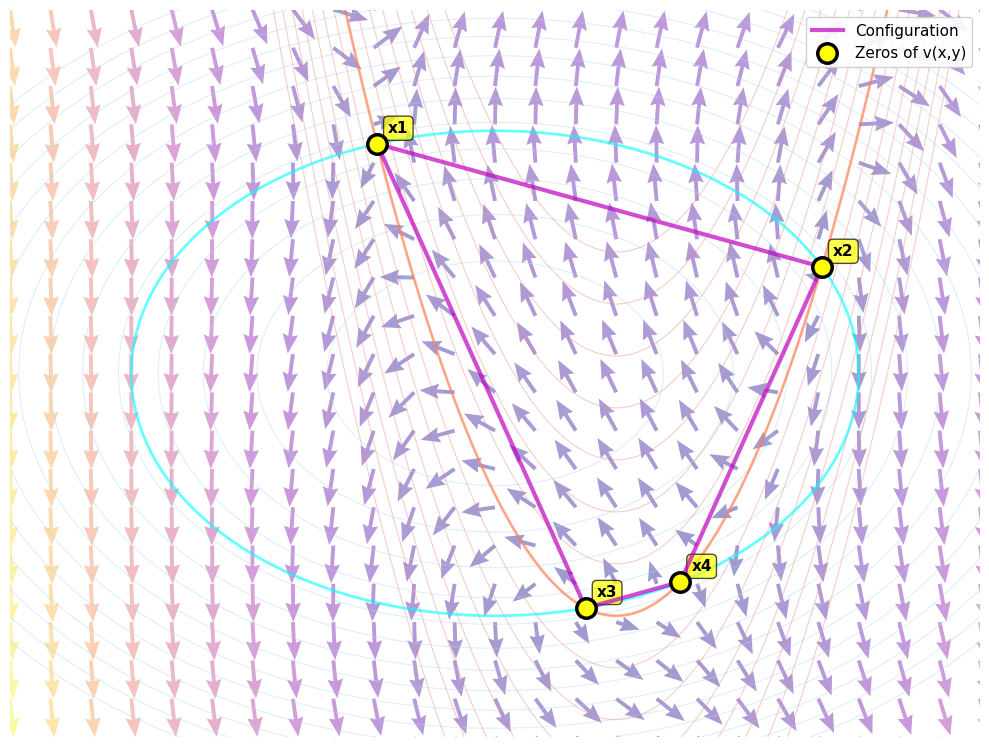


NOTE: Equipotential curves shown:
  - Light blue curves: level sets of f(x,y)
  - Light coral curves: level sets of g(x,y)
  - Cyan curves (bold): f(x,y) = 0 and g(x,y) = 0 (the conic sections)
  - The vector field v(x,y) = (f,g) is perpendicular to these equipotentials


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Define two conic sections that intersect at 4 points
# Ellipse: x^2/9 + y^2/4 = 1
def f(x, y):
    return x**2/9 + y**2/4 - 1

# Parabola: y = x^2 - 2x - 1
def g(x, y):
    return y - x**2 + 2*x + 1

# Vector field: v(x,y) = (f(x,y), g(x,y))
def vector_field(x, y):
    return f(x, y), g(x, y)

# For finding zeros
def system(vars):
    x, y = vars
    return [f(x, y), g(x, y)]

# Find intersection points (zeros of the vector field)
print("=" * 70)
print("FINDING INTERSECTION POINTS (ZEROS OF VECTOR FIELD)")
print("=" * 70)
print()

# Try multiple initial guesses to find all 4 intersection points
initial_guesses = [
    (-2, 0), (0, 2), (2, 0), (0, -2),
    (-3, 1), (3, 1), (-1, -1), (1, -1)
]

zeros = []
tolerance = 1e-6

for guess in initial_guesses:
    try:
        sol = fsolve(system, guess, full_output=True)
        x_sol, y_sol = sol[0]
        info = sol[1]

        # Check if it's actually a solution
        fx, gx = f(x_sol, y_sol), g(x_sol, y_sol)
        if abs(fx) < tolerance and abs(gx) < tolerance:
            # Check if we already have this solution
            is_new = True
            for existing_x, existing_y in zeros:
                if abs(x_sol - existing_x) < tolerance and abs(y_sol - existing_y) < tolerance:
                    is_new = False
                    break

            if is_new:
                zeros.append((x_sol, y_sol))
                print(f"Zero found at: ({x_sol:.6f}, {y_sol:.6f})")
                print(f"  f({x_sol:.6f}, {y_sol:.6f}) = {fx:.10f}")
                print(f"  g({x_sol:.6f}, {y_sol:.6f}) = {gx:.10f}")
                print()
    except:
        pass

print(f"Total number of zeros found: {len(zeros)}")
print("=" * 70)
print()

# Create visualization
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Create grid for contour plots
x_range = np.linspace(-4, 4, 400)
y_range = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x_range, y_range)

# Compute f and g over the grid
F = f(X, Y)
G = g(X, Y)

# Create grid for vector field (cleaner spacing)
x_vec = np.linspace(-4, 4, 25)
y_vec = np.linspace(-3, 3, 20)
X_vec, Y_vec = np.meshgrid(x_vec, y_vec)

# Compute vector field components
U = f(X_vec, Y_vec)
V = g(X_vec, Y_vec)

# Normalize vectors for cleaner appearance
magnitude = np.sqrt(U**2 + V**2)
U_norm = U / (magnitude + 0.1)  # Add small value to avoid division by zero
V_norm = V / (magnitude + 0.1)

# Plot equipotential curves for f(x,y) - light blue contours
f_levels = np.linspace(-1, 2, 15)
ax.contour(X, Y, F, levels=f_levels, colors='lightblue', linewidths=0.8,
           alpha=0.4, linestyles='-')

# Plot equipotential curves for g(x,y) - light coral contours
g_levels = np.linspace(-3, 3, 15)
ax.contour(X, Y, G, levels=g_levels, colors='lightcoral', linewidths=0.8,
           alpha=0.4, linestyles='-')

# Plot vector field with normalized arrows
quiver = ax.quiver(X_vec, Y_vec, U_norm, V_norm, magnitude,
                   cmap='plasma', scale=25, width=0.004, alpha=0.4,
                   headwidth=4, headlength=5)

# Plot the conic sections for reference (the zero level curves - highlighted)
ax.contour(X, Y, F, levels=[0], colors='cyan', linewidths=2, alpha=0.6,
           linestyles='-', label='f(x,y) = 0 (Ellipse)')
ax.contour(X, Y, G, levels=[0], colors='coral', linewidths=2, alpha=0.6,
           linestyles='-', label='g(x,y) = 0 (Parabola)')

# Draw line segments between intersection points to show configuration
if len(zeros) == 4:
    # Sort zeros for a sensible connection pattern
    # Connect them in a way that shows the quadrilateral configuration
    from scipy.spatial import ConvexHull

    points = np.array(zeros)
    try:
        hull = ConvexHull(points)
        hull_points = points[hull.vertices]
        hull_points = np.vstack([hull_points, hull_points[0]])  # Close the polygon

        ax.plot(hull_points[:, 0], hull_points[:, 1], 'm-', linewidth=3,
                alpha=0.7, zorder=4, label='Configuration')
    except:
        # If points are collinear or other issue, just connect all pairs
        for i in range(len(zeros)):
            for j in range(i+1, len(zeros)):
                ax.plot([zeros[i][0], zeros[j][0]], [zeros[i][1], zeros[j][1]],
                       'k-', linewidth=1.5, alpha=0.5, zorder=4)

# Plot zeros (where vector field is zero)
if zeros:
    zeros_x = [z[0] for z in zeros]
    zeros_y = [z[1] for z in zeros]
    ax.plot(zeros_x, zeros_y, 'o', markersize=14, markerfacecolor='yellow',
            markeredgecolor='black', markeredgewidth=2.5, label='Zeros of v(x,y)', zorder=5)

    for i, (x, y) in enumerate(zeros):
        ax.annotate(f'x{i+1}', xy=(x, y), xytext=(8, 8), textcoords='offset points',
                   fontsize=11, fontweight='bold', color='black',
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

ax.legend(loc='upper right', fontsize=11, framealpha=0.9)
ax.set_aspect('equal')
ax.axis('off')

plt.tight_layout()
plt.savefig('conic_intersections_vectorfield.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nNOTE: Equipotential curves shown:")
print("  - Light blue curves: level sets of f(x,y)")
print("  - Light coral curves: level sets of g(x,y)")
print("  - Cyan curves (bold): f(x,y) = 0 and g(x,y) = 0 (the conic sections)")
print("  - The vector field v(x,y) = (f,g) is perpendicular to these equipotentials")

FINDING INTERSECTION POINTS (ZEROS OF VECTOR FIELD)

Zero found at: (-1.931852, -0.517638)
  f(-1.931852, -0.517638) = -0.0000000001
  g(-1.931852, -0.517638) = 0.0000000000

Zero found at: (0.517638, 1.931852)
  f(0.517638, 1.931852) = -0.0000000001
  g(0.517638, 1.931852) = 0.0000000000

Zero found at: (1.931852, 0.517638)
  f(1.931852, 0.517638) = -0.0000000001
  g(1.931852, 0.517638) = 0.0000000000

Zero found at: (-0.517638, -1.931852)
  f(-0.517638, -1.931852) = -0.0000000001
  g(-0.517638, -1.931852) = 0.0000000000

Total number of zeros found: 4



/tmp/ipython-input-3587700892.py:107: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(X, Y, F, levels=[0], colors='cyan', linewidths=2, alpha=0.6,
/tmp/ipython-input-3587700892.py:109: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(X, Y, G, levels=[0], colors='coral', linewidths=2, alpha=0.6,


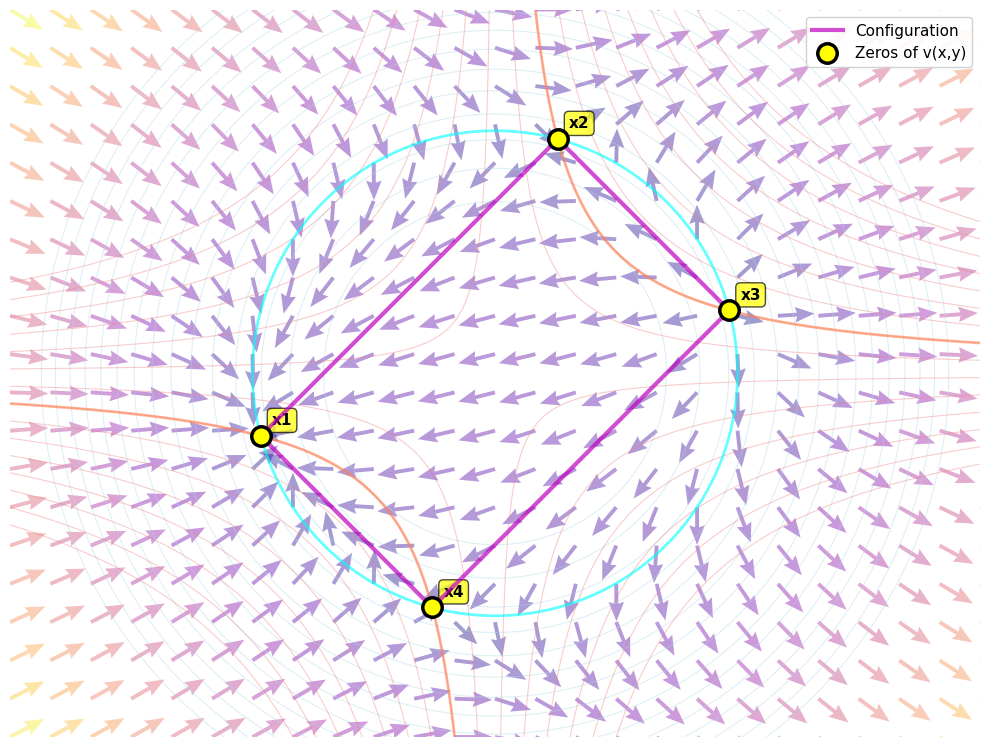


NOTE: Equipotential curves shown:
  - Light blue curves: level sets of f(x,y)
  - Light coral curves: level sets of g(x,y)
  - Cyan curve (bold): f(x,y) = 0 (the circle)
  - Coral curves (bold): g(x,y) = 0 (the rectangular hyperbola)
  - The vector field v(x,y) = (f,g) is perpendicular to these equipotentials


In [3]:
# Define two conic sections that intersect at 4 points
# Circle: x^2 + y^2 = 4
def f(x, y):
    return x**2 + y**2 - 4

# Hyperbola: xy = 1
def g(x, y):
    return x*y - 1

# Vector field: v(x,y) = (f(x,y), g(x,y))
def vector_field(x, y):
    return f(x, y), g(x, y)

# For finding zeros
def system(vars):
    x, y = vars
    return [f(x, y), g(x, y)]

# Find intersection points (zeros of the vector field)
print("=" * 70)
print("FINDING INTERSECTION POINTS (ZEROS OF VECTOR FIELD)")
print("=" * 70)
print()

# Try multiple initial guesses to find all 4 intersection points
initial_guesses = [
    (-2, 0), (0, 2), (2, 0), (0, -2),
    (-3, 1), (3, 1), (-1, -1), (1, -1),
    (1.5, 1), (-1.5, 1), (1.5, -1), (-1.5, -1),
    (0.5, 2), (-0.5, -2), (2, 0.5), (-2, -0.5)
]

zeros = []
tolerance = 1e-6

for guess in initial_guesses:
    try:
        sol = fsolve(system, guess, full_output=True)
        x_sol, y_sol = sol[0]
        info = sol[1]

        # Check if it's actually a solution
        fx, gx = f(x_sol, y_sol), g(x_sol, y_sol)
        if abs(fx) < tolerance and abs(gx) < tolerance:
            # Check if we already have this solution
            is_new = True
            for existing_x, existing_y in zeros:
                if abs(x_sol - existing_x) < tolerance and abs(y_sol - existing_y) < tolerance:
                    is_new = False
                    break

            if is_new:
                zeros.append((x_sol, y_sol))
                print(f"Zero found at: ({x_sol:.6f}, {y_sol:.6f})")
                print(f"  f({x_sol:.6f}, {y_sol:.6f}) = {fx:.10f}")
                print(f"  g({x_sol:.6f}, {y_sol:.6f}) = {gx:.10f}")
                print()
    except:
        pass

print(f"Total number of zeros found: {len(zeros)}")
print("=" * 70)
print()

# Create visualization
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Create grid for contour plots
x_range = np.linspace(-4, 4, 400)
y_range = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x_range, y_range)

# Compute f and g over the grid
F = f(X, Y)
G = g(X, Y)

# Create grid for vector field (cleaner spacing)
x_vec = np.linspace(-4, 4, 25)
y_vec = np.linspace(-3, 3, 20)
X_vec, Y_vec = np.meshgrid(x_vec, y_vec)

# Compute vector field components
U = f(X_vec, Y_vec)
V = g(X_vec, Y_vec)

# Normalize vectors for cleaner appearance
magnitude = np.sqrt(U**2 + V**2)
U_norm = U / (magnitude + 0.1)  # Add small value to avoid division by zero
V_norm = V / (magnitude + 0.1)

# Plot equipotential curves for f(x,y) - light blue contours
f_levels = np.linspace(-2, 10, 15)
ax.contour(X, Y, F, levels=f_levels, colors='lightblue', linewidths=0.8,
           alpha=0.4, linestyles='-')

# Plot equipotential curves for g(x,y) - light coral contours
g_levels = np.linspace(-4, 4, 15)
ax.contour(X, Y, G, levels=g_levels, colors='lightcoral', linewidths=0.8,
           alpha=0.4, linestyles='-')

# Plot vector field with normalized arrows
quiver = ax.quiver(X_vec, Y_vec, U_norm, V_norm, magnitude,
                   cmap='plasma', scale=25, width=0.004, alpha=0.4,
                   headwidth=4, headlength=5)

# Plot the conic sections for reference (the zero level curves - highlighted)
ax.contour(X, Y, F, levels=[0], colors='cyan', linewidths=2, alpha=0.6,
           linestyles='-', label='f(x,y) = 0 (Circle)')
ax.contour(X, Y, G, levels=[0], colors='coral', linewidths=2, alpha=0.6,
           linestyles='-', label='g(x,y) = 0 (Hyperbola)')

# Draw line segments between intersection points to show configuration
if len(zeros) == 4:
    # Sort zeros for a sensible connection pattern
    # Connect them in a way that shows the quadrilateral configuration
    from scipy.spatial import ConvexHull

    points = np.array(zeros)
    try:
        hull = ConvexHull(points)
        hull_points = points[hull.vertices]
        hull_points = np.vstack([hull_points, hull_points[0]])  # Close the polygon

        ax.plot(hull_points[:, 0], hull_points[:, 1], 'm-', linewidth=3,
                alpha=0.7, zorder=4, label='Configuration')
    except:
        # If points are collinear or other issue, just connect all pairs
        for i in range(len(zeros)):
            for j in range(i+1, len(zeros)):
                ax.plot([zeros[i][0], zeros[j][0]], [zeros[i][1], zeros[j][1]],
                       'k-', linewidth=1.5, alpha=0.5, zorder=4)
elif len(zeros) > 1:
    # For other cases, connect pairs
    for i in range(len(zeros)):
        for j in range(i+1, len(zeros)):
            ax.plot([zeros[i][0], zeros[j][0]], [zeros[i][1], zeros[j][1]],
                   'k-', linewidth=1.5, alpha=0.5, zorder=4)

# Plot zeros (where vector field is zero)
if zeros:
    zeros_x = [z[0] for z in zeros]
    zeros_y = [z[1] for z in zeros]
    ax.plot(zeros_x, zeros_y, 'o', markersize=14, markerfacecolor='yellow',
            markeredgecolor='black', markeredgewidth=2.5, label='Zeros of v(x,y)', zorder=5)

    for i, (x, y) in enumerate(zeros):
        ax.annotate(f'x{i+1}', xy=(x, y), xytext=(8, 8), textcoords='offset points',
                   fontsize=11, fontweight='bold', color='black',
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

ax.legend(loc='upper right', fontsize=11, framealpha=0.9)
ax.set_aspect('equal')
ax.axis('off')

plt.tight_layout()
plt.savefig('conic_intersections_vectorfield_4pts.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nNOTE: Equipotential curves shown:")
print("  - Light blue curves: level sets of f(x,y)")
print("  - Light coral curves: level sets of g(x,y)")
print("  - Cyan curve (bold): f(x,y) = 0 (the circle)")
print("  - Coral curves (bold): g(x,y) = 0 (the rectangular hyperbola)")
print("  - The vector field v(x,y) = (f,g) is perpendicular to these equipotentials")